# Customer Churn Prediction with Decision Tree Models.

This project employs decision tree classification models to predict customer churn in the telecom sector. Utilizing a comprehensive dataset of customer attributes, the study details the process of data preprocessing, model development using scikit-learn, and performance evaluation. The resulting model provides insights into factors influencing churn and offers a tool for identifying customers likely to discontinue services.

## Importing Rquired Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

## Loading The Dataset

In [2]:
data = pd.read_csv("Customer_Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Inspection / Analysis

In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Categorical columns
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :',categorical_cols)

Categorical columns : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [7]:
# Numerical columns
numerical_cols = [col for col in data.columns if data[col].dtype != 'object']
print('NUmerical columns :',numerical_cols)

NUmerical columns : ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [8]:
# Check for missing values
print("\nMissing values before handling:\n", data.isnull().sum())


Missing values before handling:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Data Vizualization

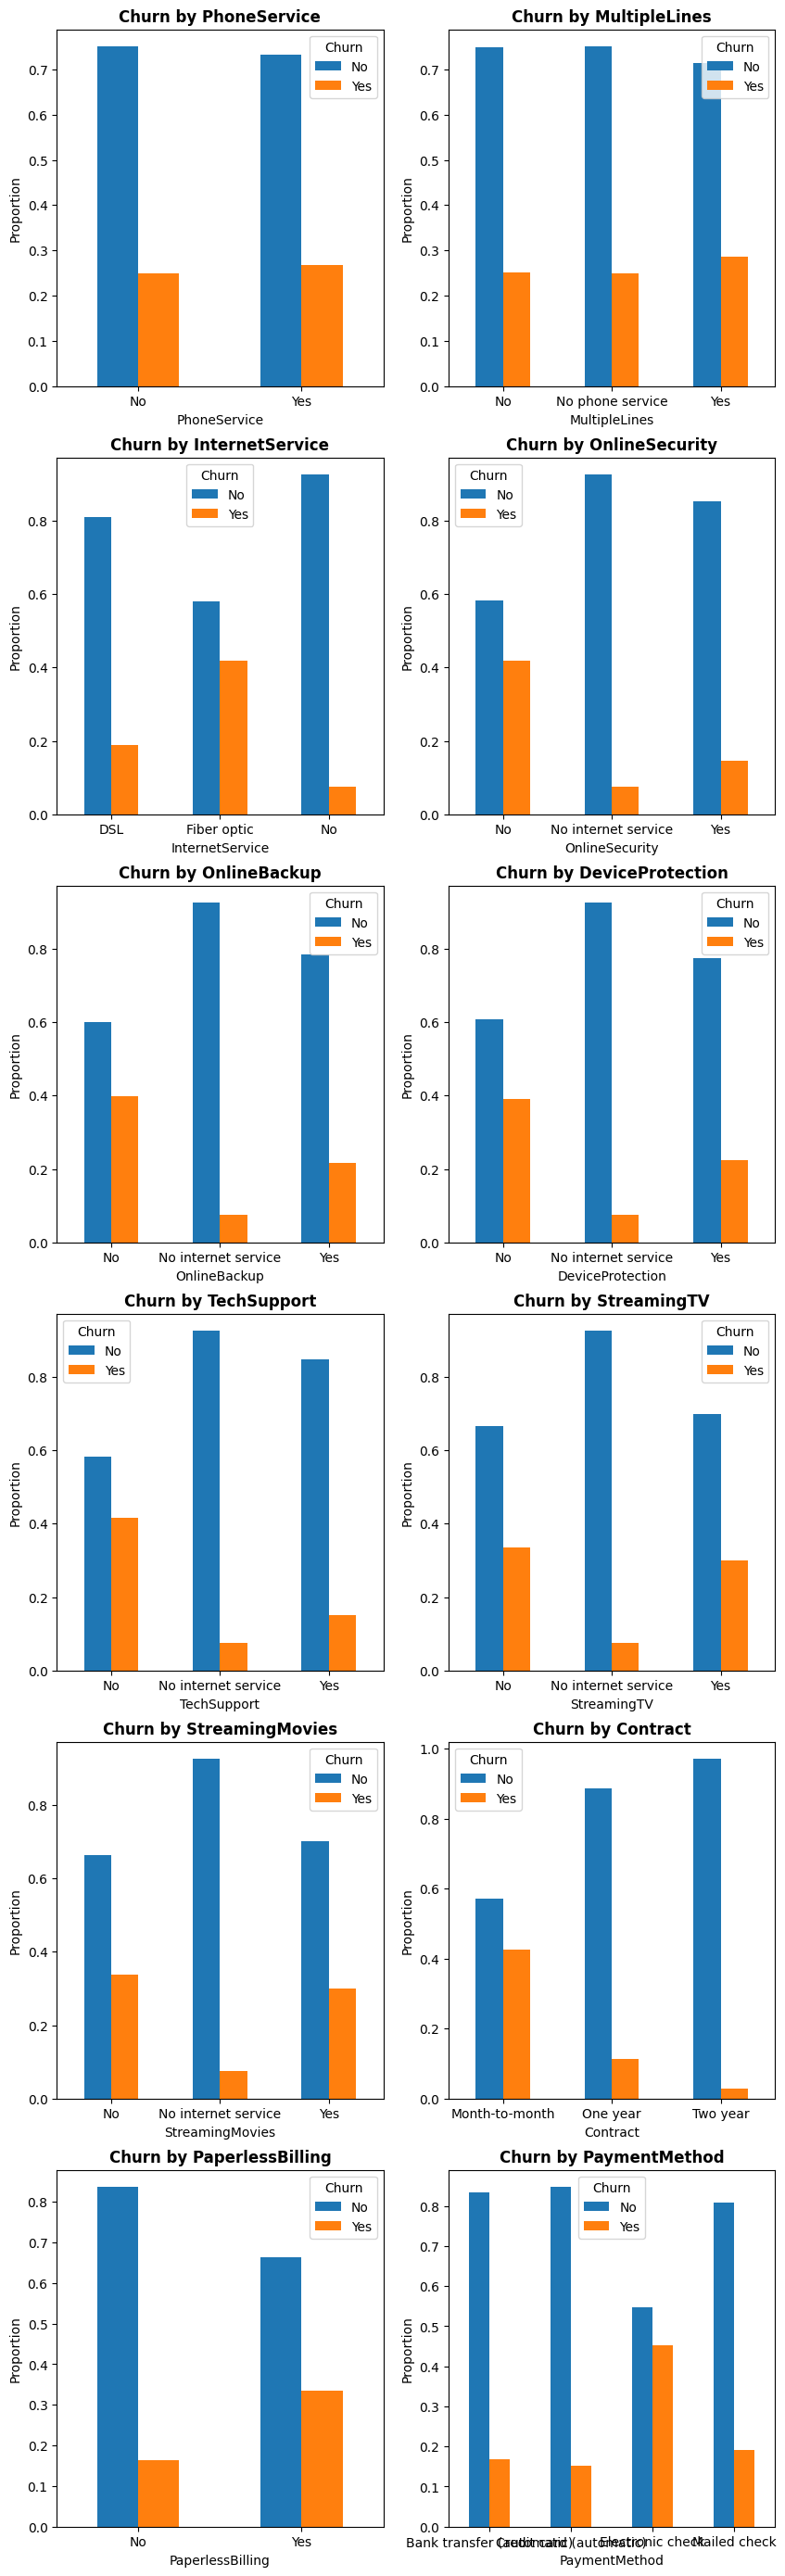

In [9]:
# 4. Stacked Bar Chart of Services and Churn
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 35))
for i, service in enumerate(services):
    row = i // 2
    col = i % 2
    churn_counts = data.groupby(service)['Churn'].value_counts(normalize=True).unstack()
    churn_counts.plot(kind='bar', stacked=False, ax=axes[row, col])
    axes[row, col].set_title(f'Churn by {service}',fontdict = {'fontsize' : 12,'fontweight' : 'bold'})
    axes[row, col].set_ylabel('Proportion')
    axes[row, col].tick_params(axis='x', labelrotation=0)
plt.show()

## Convert categorical features to numerical using Label Encoding

In [10]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [11]:
print("\nFirst 5 rows after label encoding:\n")
data.head()


First 5 rows after label encoding:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [12]:
# Separate features (X) and target (y)
X = data.iloc[:,:-1]
y = data['Churn']

## Feature Scaling

Decision trees don't need feature scaling. They make splits based on value comparisons, and the magnitude of the values doesn't fundamentally change the splitting logic. Monotonic scaling transformations also don't affect the order of data points, which is what decision trees rely on.

## Model Initialization and Training

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10, 15],
    'max_features': ['sqrt', 'log2', 0.5, None],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
best_dt_model = grid_search.best_estimator_

In [ ]:
y_pred_tuned = best_dt_model.predict(X_test)

## Model Evaluation

In [ ]:
# Evaluate the model
print("\n--- Model Evaluation ---")
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {accuracy_tuned:.4f}")

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

## Conclusion

In conclusion, this project successfully demonstrated the application of decision tree models for predicting customer churn within the telecommunications industry. The decision tree model achieved an accuracy of 78.42% in predicting customer churn on the test dataset. This demonstrates its capability to effectively identify a significant portion of likely churners, providing a basis for targeted retention efforts.